# Project 4: Heart Disease and Time Series Analysis

### Notebook Goals
The goal of this notebook is to visualize how rates of heart disease change overtime amongst demographic groups and geographic regions across the US, such as: age, sex, race, and geographic region. The trend we are most interested in is in regards to 'All heart disease' so we subsetted the data to focus on those trends first.

### Loading our libraries, mounting our drive, and uploading our data

In [ ]:
import pandas as pd
import random as rd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels import tsa

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/project4_heart_disease/cleaned_heart_disease.csv')

In [ ]:
df.head()

,Unnamed: 0,year,state,county,disease,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,age_group,race,sex,rate_disease,region
0,53,2016,AL,Autauga,All stroke,25.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",21.3,30.9,Adult,Overall,Overall,0.0257,Southeast
1,79,2011,AL,Autauga,All stroke,29.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",22.9,39.7,Adult,Overall,Men,0.0295,Southeast
2,106,2017,AL,Autauga,All stroke,33.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",25.4,44.1,Adult,Overall,Men,0.0336,Southeast
3,108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Adult,Overall,Overall,0.1287,Southeast
4,109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Adult,Overall,Overall,0.1281,Southeast


#### This is the size of our cleaned file that we created in our data_cleaning notebook.

In [ ]:
df.shape

(3108720, 15)

#### Subsetting our data for 'All heart disease'

In [ ]:
heart_df = df[df['disease']=='All heart disease']

In [ ]:
heart_df.shape

(621744, 15)

#### Creating Line Graph to show rate of heart disease overtime by Age Group (Adult and Senior)

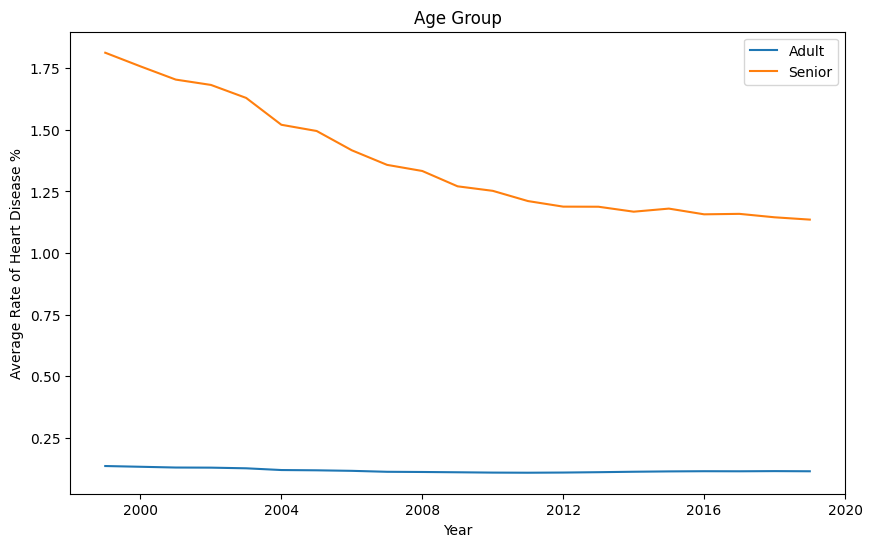

In [ ]:
# Grouped dataframe based on year and age_group
grouped_df = heart_df.groupby(['year', 'age_group'])['rate_disease'].mean().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the columns (ID variables) and plot each line
for column in grouped_df.columns:
    ax.plot(pd.to_datetime(grouped_df.index,format='%Y'), grouped_df[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Average Rate of Heart Disease %')

# Set the plot title
ax.set_title('Age Group')

# Add a legend
ax.legend()

# Display the plot
plt.show()

#### Creating Line Graph to show rate of heart disease overtime by Geographic Region (Southeast, Southwest, Northeast, Midwest, and West)

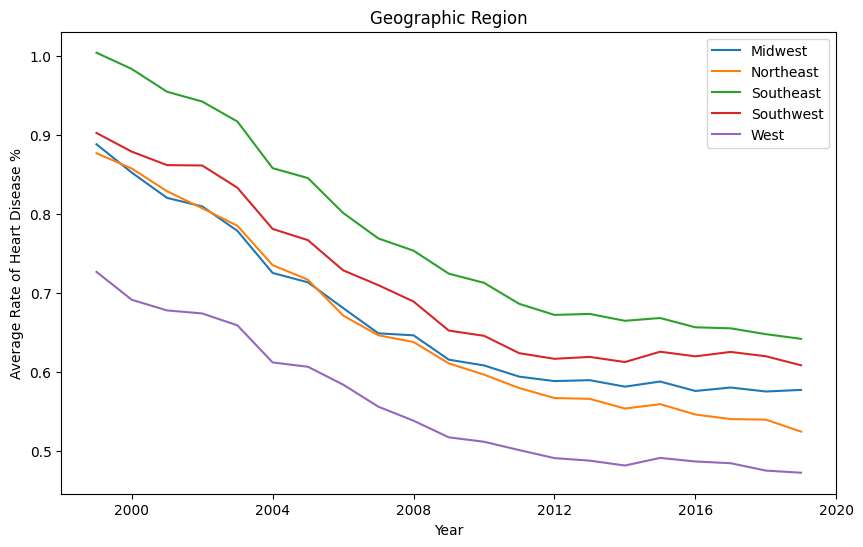

In [ ]:
# Grouped dataframe based on year and Geographic Region
grouped_df = heart_df.groupby(['year', 'region'])['rate_disease'].mean().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the columns (ID variables) and plot each line
for column in grouped_df.columns:
    ax.plot(pd.to_datetime(grouped_df.index,format='%Y'), grouped_df[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Average Rate of Heart Disease %')

# Set the plot title
ax.set_title('Geographic Region')

# Add a legend
ax.legend()

# Display the plot
plt.show()

#### Creating Line Graph to show rate of heart disease overtime by Race (American Indian/Alaska Native, Asian/Pacific Islander, Black (Non-Hispanic), Hispanic, White, Overall)

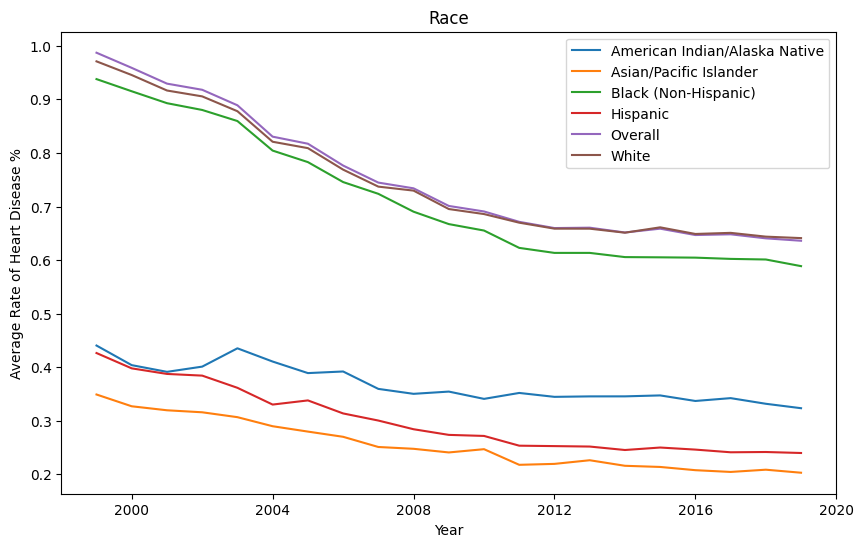

In [ ]:
# Grouped dataframe based on year and Race
grouped_df = heart_df.groupby(['year', 'race'])['rate_disease'].mean().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the columns (ID variables) and plot each line
for column in grouped_df.columns:
    ax.plot(pd.to_datetime(grouped_df.index,format='%Y'), grouped_df[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Average Rate of Heart Disease %')

# Set the plot title
ax.set_title('Race')

# Add a legend
ax.legend()

# Display the plot
plt.show()

#### Creating Line Graph to show rate of heart disease overtime by Sex (Men, Women, Overall)

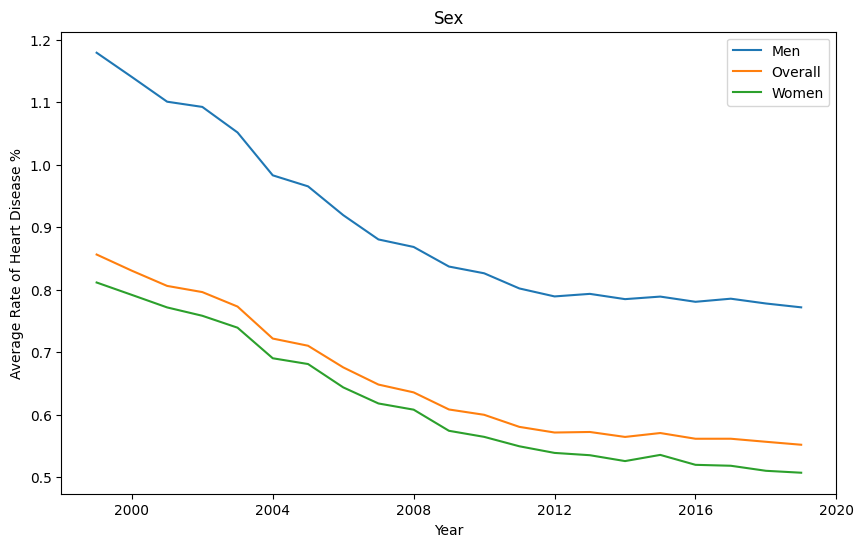

In [ ]:
# Grouped dataframe based on year and Sex
grouped_df = heart_df.groupby(['year', 'sex'])['rate_disease'].mean().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over the columns (ID variables) and plot each line
for column in grouped_df.columns:
    ax.plot(pd.to_datetime(grouped_df.index,format='%Y'), grouped_df[column], label=column)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Average Rate of Heart Disease %')

# Set the plot title
ax.set_title('Sex')

# Add a legend
ax.legend()

# Display the plot
plt.show()